Notebook Link: https://tinyurl.com/pds-git-feature-eng

# Git
* Open Source Distributed Software
* History Started with Linux Kernel Development
* Before Git – Early Version Control was centralized (1990-2000)
* Linux Kernel Development and BitKeeper (2002–2005)
* Conflict with BitMover (2005)
* Linus Torvalds Creates Git (2005)
* 2008 – GitHub was founded by developers Tom Preston-Werner, Chris Wanstrath, and PJ Hyett.
* Microsoft owned GitHub

# Machine Learning

Machine Learning (ML) is a field of artificial intelligence (AI) that enables computers to learn from data and make predictions or decisions without being explicitly programmed. It uses algorithms to identify patterns in data and improve performance over time.

**Types of Machine Learning:**
* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning

Different Supervised Learning:
* Classification
* Regression

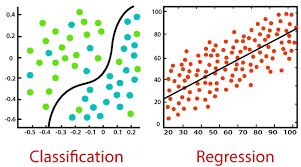

# 📌 Linear Regression: Introduction & Derivation

## What is Linear Regression?
Linear Regression is a fundamental supervised learning algorithm used for predicting a continuous output based on input variables. It assumes a **linear relationship** between the independent variable $x$ and the dependent variable $y$.

The equation of a simple linear regression model (with one independent variable) is:

$$
y = mx + b
$$

where:

- $y$ → dependent variable (output)
- $x$ → independent variable (input)
- $m$ → slope (coefficient)
- $b$ → intercept

---

## 🔹 Derivation of Linear Regression (2 Variables)
For a dataset with $n$ points $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, the goal is to find $m$ and $b$ such that the **error (difference between predicted and actual values) is minimized**.

### **1️⃣ Defining the Loss Function**
We use the **Mean Squared Error (MSE)** as the loss function:

$$
J(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (m x_i + b))^2
$$

### **2️⃣ Finding Optimal $m$ and $b$**
To minimize $J(m, b)$, we take the partial derivatives w.r.t $m$ and $b$ and set them to zero.

#### 🔹 Partial Derivative w.r.t $m$:

$$
\frac{\partial J}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - (m x_i + b))
$$

#### 🔹 Partial Derivative w.r.t $b$:

$$
\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (m x_i + b))
$$

Setting these derivatives to **zero** and solving for $m$ and $b$, we get:

$$
m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}
$$

$$
b = \frac{\sum y_i - m \sum x_i}{n}
$$

These are the **normal equations** used to compute the best-fit line for a given dataset.

---

## **📌 Summary**
✔ Linear regression finds the best-fitting line for a dataset.  
✔ We minimize the **Mean Squared Error** to determine the optimal $m$ and $b$.  
✔ The **normal equations** provide a closed-form solution for $m$ and $b$.

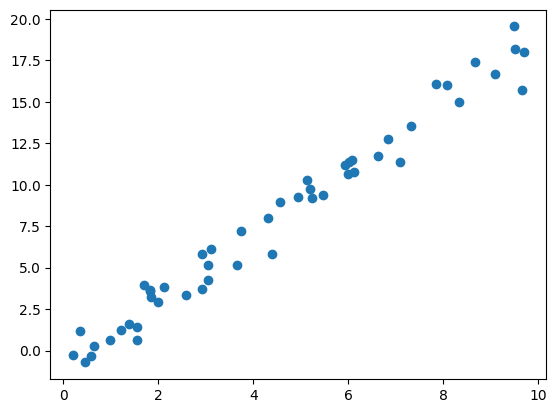

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [ ]:
x.shape

(50,)

In [ ]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
model.coef_

array([1.9776566])

In [ ]:
model.intercept_

-0.9033107255311146

In [ ]:
xfit = np.linspace(-1, 11)

In [ ]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

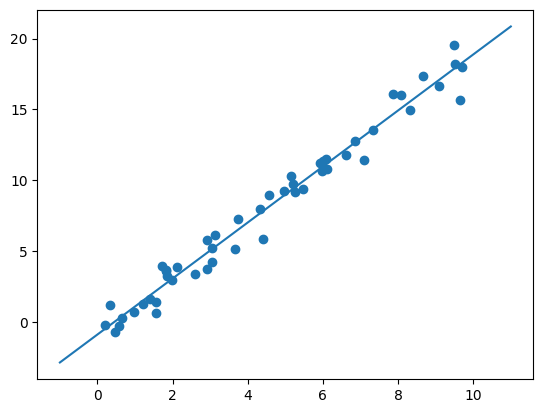

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

# Feature Engineering

In [2]:
# Categorical Features

data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [9]:
# {'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};
# This isn't right

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

# print(vec)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [5]:
vec.feature_names_

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [ ]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [11]:
# Text Features

sample = ['problem of evil',
          'evil queen',
          'horizon problem']

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (3, 5)>

In [13]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


# Pipelining

In [15]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = {
    "Feature1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Feature2": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "Target": [15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
}

df = pd.DataFrame(data)

X = df[["Feature1", "Feature2"]]
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Step 1: Feature Scaling
    ("regressor", LinearRegression())  # Step 2: Linear Regression
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(X_test)
print("Predictions:", y_pred)
print("Actual:", y_test.values)


   Feature1  Feature2
8         9        90
1         2        20
Predictions: [95. 25.]
Actual: [95 25]
